In [1]:
import pandas as pd

actor_name = "Shivaji"
raw_csv_file_name = "//home//kailash//" + actor_name
csv_file_name = actor_name + ".csv" 
yearly_stats_file_name = actor_name +"_YearWise.csv"

In [2]:
actorData = pd.read_csv(raw_csv_file_name)
# vijay = pd.read_csv("//home//kailash//Vijay.csv")
# rajini = pd.read_csv("//home//kailash//Rajini.csv")

In [3]:
actorData.rename(columns={"Genre": "Certificate"}, inplace=True)

In [4]:
actorData.to_csv(csv_file_name, index=False)

In [5]:
actorData = pd.read_csv(csv_file_name)
actorData.head()

Title Rating             Director Certificate  Year  \
0  Pooparika varugirom      NAN         A. Venkatesh         NAN  1999   
1           Padaiyappa      8.1       K.S. Ravikumar           U  1999   
2      En Aasai Rasave      5.2        Kasthuri Raja         NAN  1998   
3     Oru Yaatra Mozhi      7.0       Prathap Pothen         NAN  1997   
4            Once More      6.2  S.A. Chandrashekhar         NAN  1997   

  Duration  
0      NAN  
1   3h1min  
2      NAN  
3      NAN  
4  2h40min

In [6]:
df = actorData[["Title", "Rating", "Year"]]
df.head()

Title Rating  Year
0  Pooparika varugirom      NAN  1999
1           Padaiyappa      8.1  1999
2      En Aasai Rasave      5.2  1998
3     Oru Yaatra Mozhi      7.0  1997
4            Once More      6.2  1997

In [7]:
df.shape

(325, 3)

In [9]:
df = df[df["Rating"] != "NAN"]
df.shape

(176, 3)

In [10]:
df.head()

Title Rating  Year
1        Padaiyappa      8.1  1999
2   En Aasai Rasave      5.2  1998
3  Oru Yaatra Mozhi      7.0  1997
4         Once More      6.2  1997
5         Pasumponn      7.0  1995

In [11]:
df.tail()

Title Rating  Year
319  Thirumbi Paar      7.0  1953
321          Panam      6.1  1952
322     Parasakthi      7.4  1952
323          Gauri      7.0  1968
324   Bangaru Babu      6.6  1973

In [12]:
# import matplotlib.pyplot as plt
# plt.figure()
# plt.scatterplot()
import numpy as np


In [13]:
df["Rating"] = df["Rating"].astype(np.float)
# df.plot(kind="scatter", x="Year", y="Rating")

In [14]:
df["Year"] = df["Year"].astype(np.int)

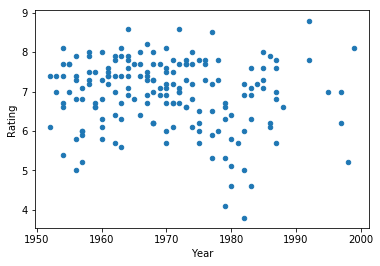

In [16]:
df.plot(kind="scatter", x="Year", y="Rating")

In [17]:
# df_yearWise = pd.dataFrame({Year=[], })

# Year | Total Movies | Total Rating | Average Rating

In [18]:
df_yearWise = pd.DataFrame(columns = ["Year","totalMovies", "totalRating","averageRating"])

In [31]:
df.sort_values("Year",inplace=True)

In [32]:
yearPrev = 0 
yearCurr = 0
moviesCount = 0
moviesRating = 0
year = []
MoviesCount = []
MoviesRating = []

for index, row in df.iterrows():
    if yearPrev == 0 & yearCurr ==0:
        yearPrev = row.Year
        yearCurr = row.Year
        year.append(row.Year)
    yearCurr = row.Year
    
    if yearPrev == yearCurr:
        moviesCount += 1 
        moviesRating += row.Rating
    
    
    if yearPrev != yearCurr:
        if yearPrev not in year:
            year.append(yearPrev)
        MoviesCount.append(moviesCount)
        MoviesRating.append(moviesRating)
        moviesCount = 1
        moviesRating = row.Rating
    yearPrev = yearCurr
print('{},{},{}'.format(len(year),len(MoviesCount),len(MoviesRating)))
print(year)
print(MoviesCount)
print(MoviesRating)
df_yearWise['Year'] = year
df_yearWise['totalMovies'] = MoviesCount
df_yearWise['totalRating'] = MoviesRating
df_yearWise['averageRating'] =df_yearWise['totalRating'] /df_yearWise['totalMovies'] 


    
    
    

41,41,41
[1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1992, 1995, 1997, 1998]
[2, 2, 6, 3, 6, 6, 5, 4, 6, 5, 6, 6, 7, 2, 4, 6, 8, 3, 9, 6, 6, 6, 5, 5, 3, 5, 3, 5, 4, 1, 5, 5, 1, 4, 3, 5, 1, 2, 1, 2, 1]
[13.5, 14.4, 41.9, 22.4, 40.199999999999996, 37.0, 37.9, 27.4, 40.3, 37.1, 42.199999999999996, 42.0, 53.3, 14.5, 29.5, 44.0, 55.9, 21.700000000000003, 62.80000000000001, 42.0, 44.1, 43.7, 35.8, 32.2, 22.8, 33.4, 21.1, 29.0, 21.9, 5.7, 28.9, 32.5, 7.2, 30.0, 20.200000000000003, 34.9, 6.6, 16.6, 7.0, 13.2, 5.2]


In [33]:
df_yearWise

Year  totalMovies  totalRating  averageRating  Year of Acting
0   1952            2         13.5       6.750000              47
1   1953            2         14.4       7.200000              46
2   1954            6         41.9       6.983333              45
3   1955            3         22.4       7.466667              43
4   1956            6         40.2       6.700000              40
5   1957            6         37.0       6.166667              36
6   1958            5         37.9       7.580000              35
7   1959            4         27.4       6.850000              34
8   1960            6         40.3       6.716667              33
9   1961            5         37.1       7.420000              32
10  1962            6         42.2       7.033333              31
11  1963            6         42.0       7.000000              30
12  1964            7         53.3       7.614286              29
13  1965            2         14.5       7.250000              28
14  1966            4         29.5       7.375000              27
15  1967            6         44.0       7.333333              26
16  1968            8         55.9       6.987500              25
17  1969            3         21.7       7.233333              24
18  1970            9         62.8       6.977778              23
19  1971            6         42.0       7.000000              22
20  1972            6         44.1       7.350000              21
21  1973            6         43.7       7.283333              20
22  1974            5         35.8       7.160000              19
23  1975            5         32.2       6.440000              18
24  1976            3         22.8       7.600000              17
25  1977            5         33.4       6.680000              16
26  1978            3         21.1       7.033333              15
27  1979            5         29.0       5.800000              14
28  1980            4         21.9       5.475000              13
29  1981            1          5.7       5.700000              12
30  1982            5         28.9       5.780000              11
31  1983            5         32.5       6.500000              10
32  1984            1          7.2       7.200000               9
33  1985            4         30.0       7.500000               8
34  1986            3         20.2       6.733333               7
35  1987            5         34.9       6.980000               6
36  1988            1          6.6       6.600000               5
37  1992            2         16.6       8.300000               4
38  1995            1          7.0       7.000000               3
39  1997            2         13.2       6.600000               2
40  1998            1          5.2       5.200000               1

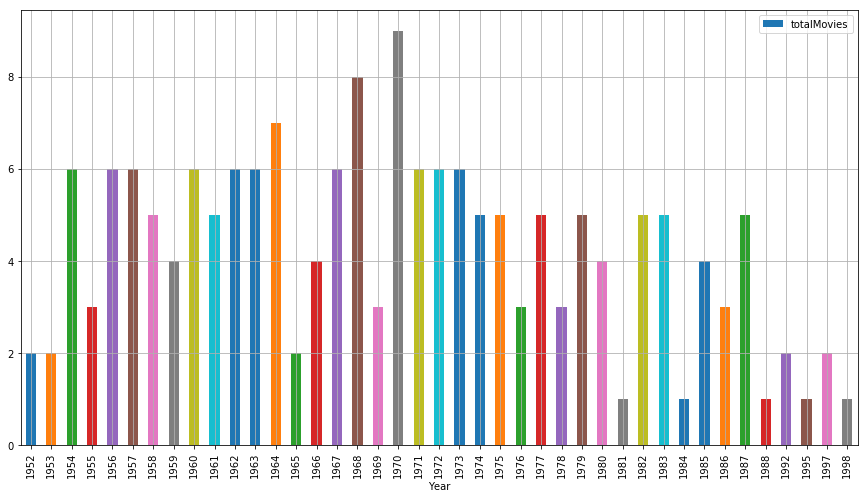

In [34]:
df_yearWise.plot(kind="bar", x="Year", y="totalMovies",figsize=(15,8),xticks=list(range(0,20,1)),grid=True)


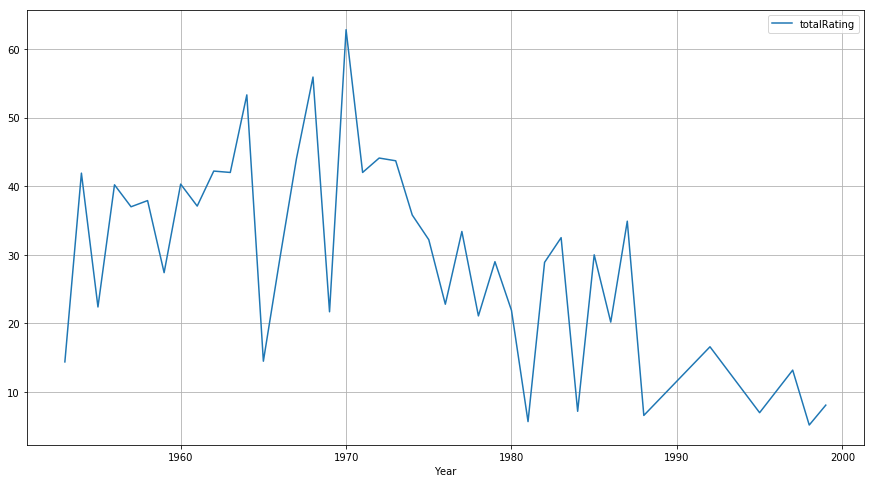

In [23]:
df_yearWise.plot(kind="line", x="Year", y="totalRating",legend=True,grid=True,figsize=(15,8))

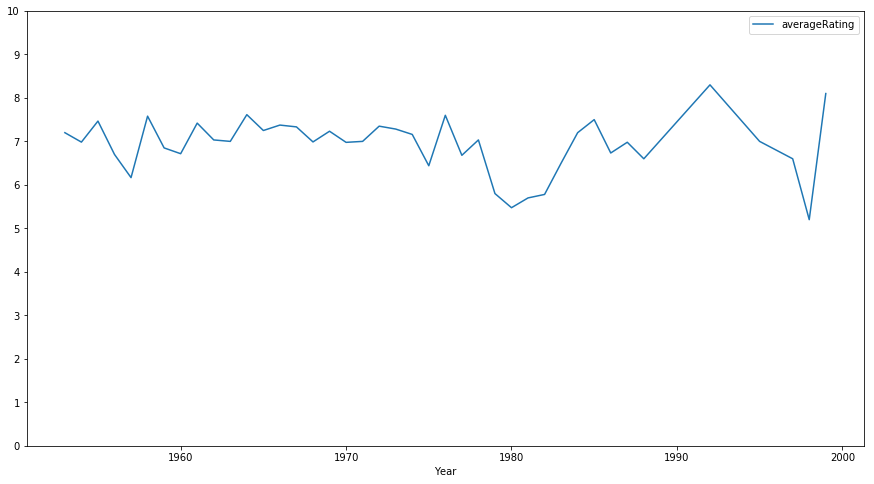

In [24]:
df_yearWise.plot(kind="line", x="Year", y="averageRating",yticks=[0,1,2,3,4,5,6,7,8,9,10],figsize=(15,8))

In [25]:
first_year_of_acting = np.min(df_yearWise["Year"])
df_yearWise["Year of Acting"] = df_yearWise["Year"] + 1 - first_year_of_acting
df_yearWise.head()

Year  totalMovies  totalRating  averageRating  Year of Acting
0  1999            1          8.1            8.1              47
1  1998            1          5.2            5.2              46
2  1997            2         13.2            6.6              45
3  1995            1          7.0            7.0              43
4  1992            2         16.6            8.3              40

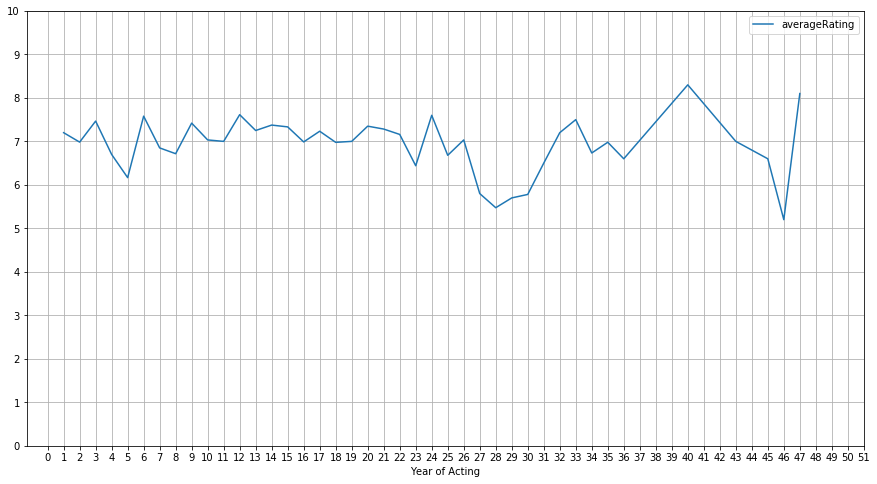

In [30]:
df_yearWise.plot(kind="line", x="Year of Acting", y="averageRating",yticks=[0,1,2,3,4,5,6,7,8,9,10],xticks = list(range(0,df_yearWise["Year of Acting"].max()+5,1)),figsize=(15,8),grid=True)

In [27]:
df_yearWise.to_csv(yearly_stats_file_name, index=False)

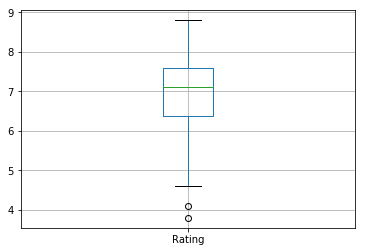

In [28]:
df.boxplot(column="Rating")